### K-Meansとは
k-meansクラスタリングは、教師なし学習アルゴリズムの1つです。

ラベルのないデータ点を、あらかじめ自分で決めた数のクラスタ（グループ）に割り当てる機能を持ちます。

k-meansはたがいに類似した点をグループ化することによって、データにクラスタラベルを割り当てることによってクラスタリングを実行します。

### k-meansの弱点
k-meansには一つだけ弱点があります。

初回にランダムに生成されたセントロイドの場所によっては極度に偏ったクラスタリングができたり、なかなか収束しない事態に陥ってしまう点です。

そこで、初期のセントロイドの選び方に改良を加えたk-means++が生み出されました。

現在の教師なしクラスタリングのメインはk-means++です。

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

# データの読み込み
df = pd.read_csv('./アヤメの品種分類.csv', encoding='shift-jis')
df = df.iloc[:,0:4]
df

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
#k-means++のモデル構築
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)
#「init = 'k-means'」を削除すると、通常のk-meansで実行されます。

#k-means++のモデル実行（クラスタリング）
clusters = kmeans.fit(df)
df['cluster'] = clusters.labels_
df

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


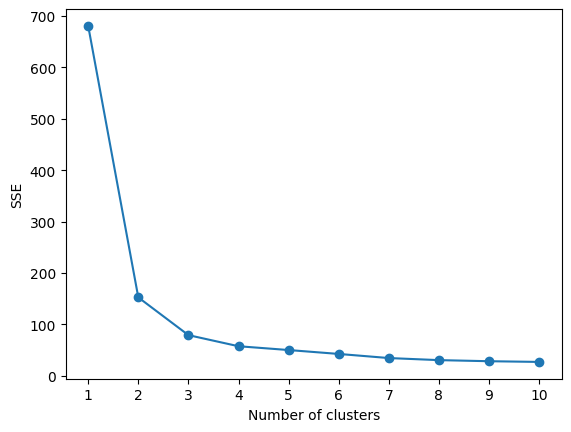

In [4]:
#Elbow法の実装（モジュール追加）
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#クラスタリングに用いるデータの再読込み
df = df.iloc[:,0:4]

#SSEの算出
SSE=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,
               init='k-means++',
               random_state=0)
    model.fit(df)
    SSE.append(model.inertia_)

#Elbow法のグラフ描画
plt.plot(range(1,11), SSE, marker='o')
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()